In [1]:
from climada.engine import Impact



In [ ]:
import itertools
from climada.engine import Impact

country = 'global'
warming_levels = ['1', '2']
dir_impacts = {}
dir_impacts['pop'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/compound/'
dir_impacts['assets'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/compound/'
    
exposures = ['assets', 'pop']
hazards = ['TC', 'RF']
combinations = list(itertools.combinations(hazards, 2))

impact_combined_ordered = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_ordered_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

impact_combined = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

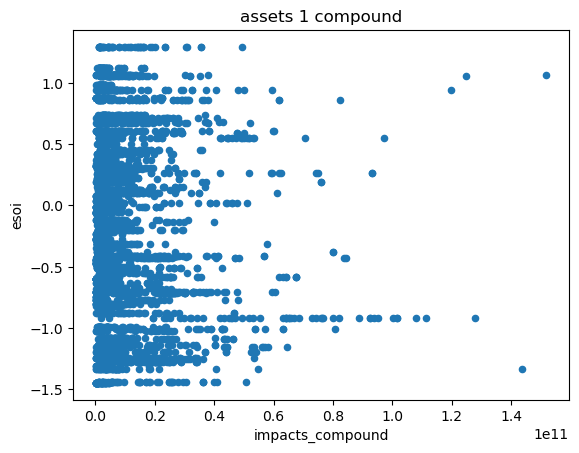

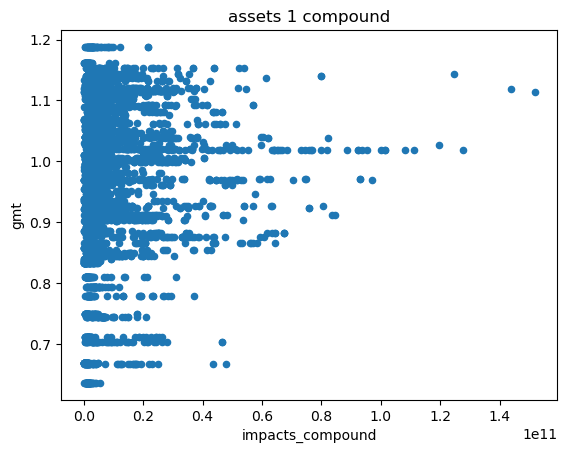

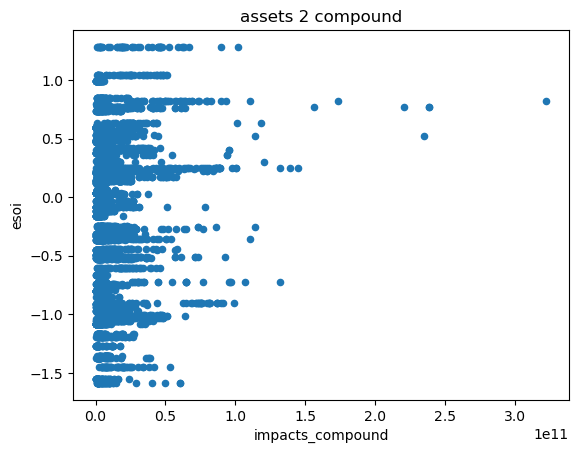

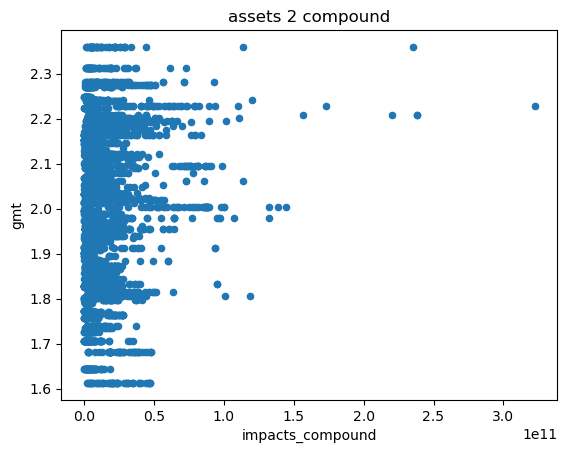

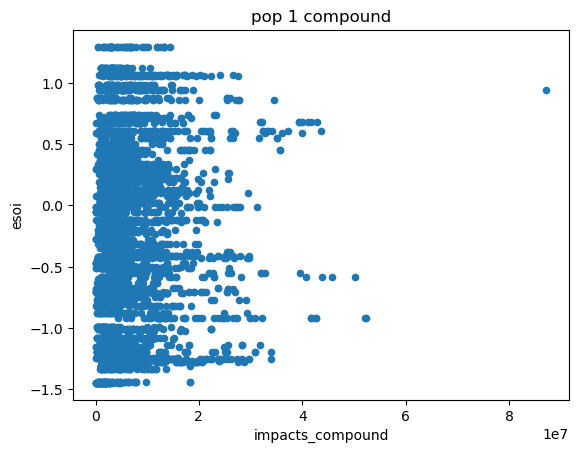

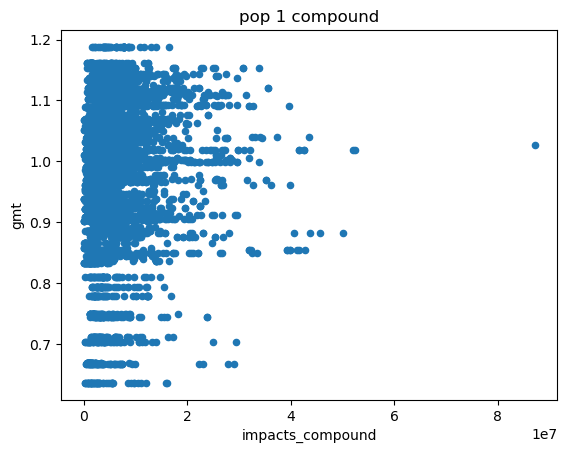

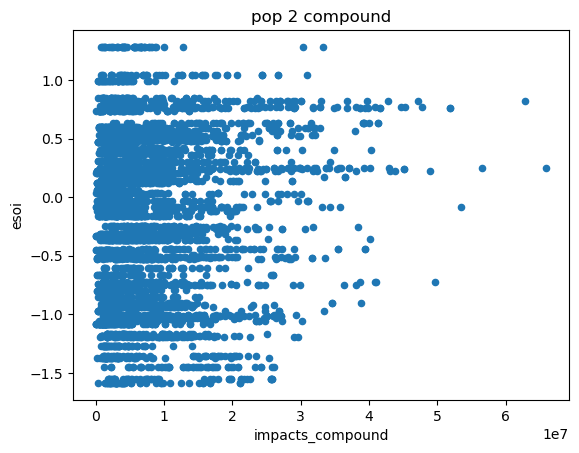

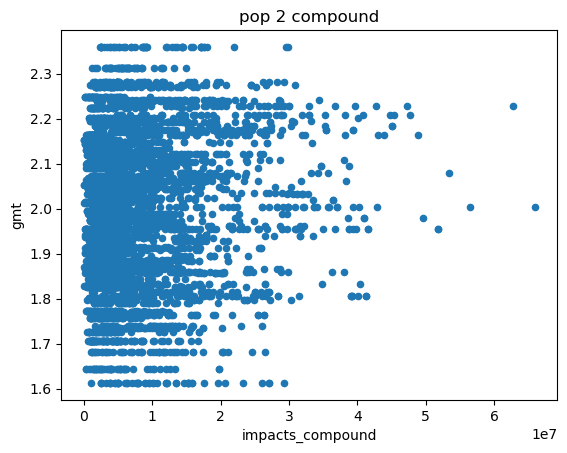

In [22]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

ds = xr.open_dataset("/Users/szelie/Downloads/climate_index.nc")
df = ds.to_dataframe().reset_index()
df = df.groupby(['rcp','gcm','year']).mean().reset_index()
df['model'] = df['year'].astype('str') + '_' + df['gcm'].str.lower() + '_' + df['rcp']
for exp in ['assets','pop']:
    for temp in ['1','2']:
        models = ["_".join(event.split("_")[0:3]) for event in impact_combined_ordered[temp][exp][('TC','RF')].event_name]
        impact_df = pd.DataFrame({'model':models, 'impacts_compound': impact_combined_ordered[temp][exp][('TC','RF')].at_event}) 
        
        impact_df = impact_df.merge(df)
        impact_df['combined_factor'] = (df.gmt-df.gmt.min())/(df.gmt.max()-df.gmt.min()) + (df.esoi-df.esoi.min())/(df.esoi.max()-df.esoi.min())

        impact_df.plot.scatter('impacts_compound', 'esoi')
        plt.title(" ".join([exp, temp, 'compound']))

        impact_df.plot.scatter('impacts_compound', 'gmt')
        plt.title(" ".join([exp, temp, 'compound']))
        
#         impact_df.plot.scatter('impacts_compound', 'combined_factor')
#         plt.title(" ".join([exp, temp, 'compound']))
        
        

In [14]:
impact_df

,model,impacts_combined,rcp,gcm,year,month,gmt,esoi
0,2019_ipsl-cm5a-lr_rcp26,3.672166e+06,rcp26,IPSL-CM5A-LR,2019,6.5,1.825932,0.527948
1,2019_ipsl-cm5a-lr_rcp26,1.130080e+06,rcp26,IPSL-CM5A-LR,2019,6.5,1.825932,0.527948
2,2019_ipsl-cm5a-lr_rcp26,2.205267e+06,rcp26,IPSL-CM5A-LR,2019,6.5,1.825932,0.527948
3,2019_ipsl-cm5a-lr_rcp26,3.586088e+06,rcp26,IPSL-CM5A-LR,2019,6.5,1.825932,0.527948
4,2019_ipsl-cm5a-lr_rcp26,3.254596e+06,rcp26,IPSL-CM5A-LR,2019,6.5,1.825932,0.527948
...,...,...,...,...,...,...,...,...
5245,2086_gfdl-esm2m_rcp60,1.304905e+07,rcp60,GFDL-ESM2M,2086,6.5,2.201485,-0.360862
5246,2086_gfdl-esm2m_rcp60,1.360189e+06,rcp60,GFDL-ESM2M,2086,6.5,2.201485,-0.360862
5247,2086_gfdl-esm2m_rcp60,3.283674e+06,rcp60,GFDL-ESM2M,2086,6.5,2.201485,-0.360862
5248,2086_gfdl-esm2m_rcp60,1.022868e+07,rcp60,GFDL-ESM2M,2086,6.5,2.201485,-0.360862


In [3]:
from climada.engine import Impact

dir_impacts = "/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/impacts_multi_risk/results3/yearsets/"

hazards = ['TC', 'RF']
exposures = ['pop', 'assets']
warming_levels = ['1','2']
country = 'global'

impacts_yearsets = {warming: {exposure: {hazard: 
                   Impact.from_csv(
                       "".join([dir_impacts, hazard, '_', exposure,"_impacts_yearsets_150arcsec_", warming, "_", country, "_test.csv"]))
                   for hazard in hazards} for exposure in exposures} for warming in warming_levels}








/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  imp_df = pd.read_csv(file_name)
/Users/szelie/python_projects/climada_python/climada/engine/impact.py:912: DtypeWarning: Columns (0,1,2,3,7,14) have mix

In [ ]:
plt.scatter(impacts_yearsets['1']['assets']['TC'].at_event, impacts_yearsets['1']['assets']['RF'].at_event)

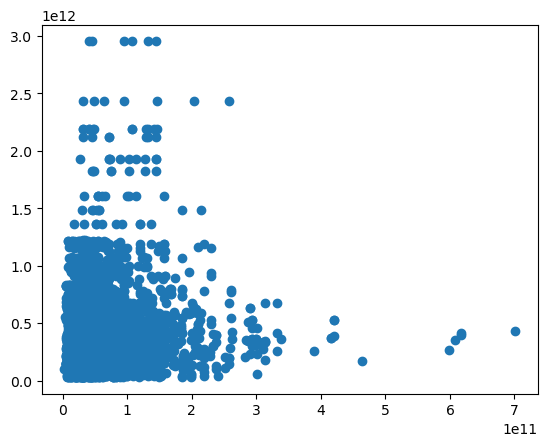

In [70]:
plt.scatter(impacts_yearsets['2']['assets']['TC'].at_event, impacts_yearsets['2']['assets']['RF'].at_event)

In [5]:
import numpy as np
def order_events_by_indices(impact, indices):
    """
    Order event names based on given strings contained in the event names.

    Parameters
    ----------
    impact: Impact
        with event_name based on the given strings
    n_events: Int
        Number of events in the output. Default: 1
    list_string : list
        A list of string based on which to order the events.
        For example climate models ['miroc5','ipsl-cm5a-lr','gfdl-esm2m','hadgem2-es']
        default is None


    Raises
    ------
    AttributeError
        If no list is providing

    Returns
    -------
    impact : Impact
        Impact yearset.

    """
    impact_ordered = Impact()
    if impact_ordered.imp_mat.shape[0]>0:   
        impact_ordered.imp_mat = impact.imp_mat[indices]
    
    impact_ordered.event_name = [impact.event_name[index] for index in indices]
    impact_ordered.event_id = np.arange(len(impact_ordered.event_name))
    frequency = impact.frequency[indices]
    impact_ordered.frequency = frequency*(len(impact.event_id)/len(impact_ordered.event_id))
    impact_ordered.at_event = impact.at_event[indices]
    impact_ordered.aai_agg = np.median(impact_ordered.at_event)
    impact_ordered.coord_exp = impact.coord_exp
    impact_ordered.date = impact.date[indices]
    return impact_ordered

fq = impacts_yearsets['1']['assets']['RF'].calc_freq_curve(return_per=np.arange(1,100))
#fq.impact = fq.impact + impacts_yearsets['1980_2010']['assets']['TC'].calc_freq_curve(return_per=np.arange(1,100)).impact

import matplotlib.pyplot as plt
import numpy as np

def make_fq_list(impact, factor):
    fq_list = []
    for n in range(10000):
        imp_sample = order_events_by_indices(impact, shuffle(np.arange(len(impact.event_name)))[0:500])
        fq = imp_sample.calc_freq_curve(np.arange(0,100))
        fq_list.append(fq.impact/factor)
    return fq_list, fq.return_per

def plot_return_period_samples(fq_list, return_per, ax, color, label, range=True, linestyle="solid"):
    ax.plot(fq.return_per,np.median(fq_list,axis=0), color=color, label=label, linestyle=linestyle)
    ax.legend()
    if range:
        ax.fill_between(fq.return_per,np.median(fq_list,axis=0),np.percentile(fq_list,q=95,axis=0), color=color, alpha=0.3)
        ax.fill_between(fq.return_per,np.percentile(fq_list,q=5,axis=0), np.median(fq_list,axis=0),color=color, alpha=0.3)
    return ax

In [34]:
len(fq_list)

1000

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


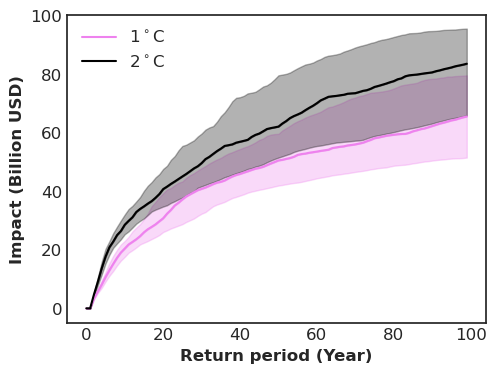

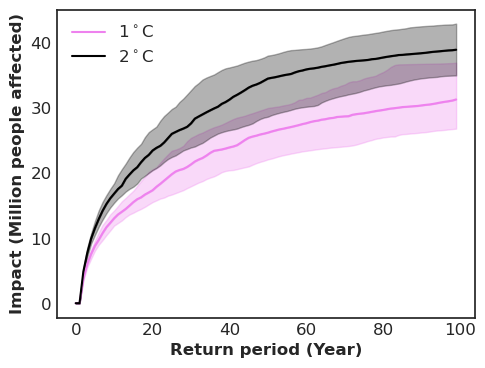

In [6]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

aai = {}
y100_aai = {}


colors = {'1':'lightblue', '2':'plum', '3':'black'}
factor_dict = {"assets":1e9, "pop":1e6}
ylabel = {"assets":"Impact (Billion USD)","pop":"Impact (Million people affected)"}


for exposure in ["assets", "pop"]:
    aai[exposure] = {}
    y100_aai[exposure] = {}
    fig,ax = plt.subplots(figsize=(5.4,4))

    fq_list, fq.return_per =  make_fq_list(impact_combined_ordered['1'][exposure][('TC', 'RF')],  factor=factor_dict[exposure])
    plot_return_period_samples(fq_list, fq.return_per, ax, color="Violet", label="1$^\circ$C", range=True)
    y100_aai[exposure]['1'] = np.median(fq_list, axis=0)[-1]
    aai[exposure]['1'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))

    
    fq_list, fq.return_per =  make_fq_list(impact_combined_ordered['2'][exposure][('TC', 'RF')], factor=factor_dict[exposure])
    plot_return_period_samples(fq_list, fq.return_per, ax, color="black", label="2$^\circ$C", range=True)
    y100_aai[exposure]['2'] = np.median(fq_list, axis=0)[-1]
    aai[exposure]['2'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))

#         fq_list_rf, fq.return_per =  make_fq_list(impact_combined_ordered['3'][exposure][('TC', 'RF')])
#         plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="gray", label="3", range=True)


    #ax.set_ylabel(ylabel[exposure])
    ax.set_xlabel("Return period (Year)")
    
    ax.set_ylabel(ylabel[exposure])

    #plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/compound_ordered_cc_'+exposure+'.pdf', bbox_inches='tight')

    #ax.set_title(" ".join([haz, exposure]))
        
        

In [7]:
cc_100y = {exp:{warming:{'imp':(y100_aai[exp][warming] - y100_aai[exp]['1'])/y100_aai[exp]['1']\
                                                     }for warming in y100_aai[exp]} \
     for exp in y100_aai}       


cc_aai = {exp:{warming:{'imp':(aai[exp][warming] - aai[exp]['1'])/aai[exp]['1']\
                                          }for warming in aai[exp]} \
     for exp in aai}  

In [8]:
cc_100y

{'assets': {'1': {'imp': 0.0}, '2': {'imp': 0.27480689620044585}},
 'pop': {'1': {'imp': 0.0}, '2': {'imp': 0.24349419414080156}}}

In [9]:
cc_aai

{'assets': {'1': {'imp': 0.0}, '2': {'imp': 0.2846261431705611}},
 'pop': {'1': {'imp': 0.0}, '2': {'imp': 0.28680895264671447}}}

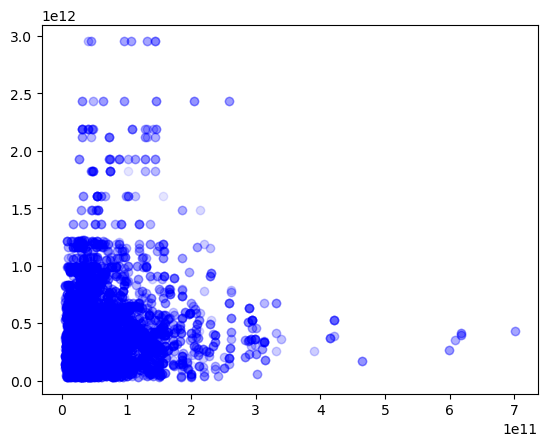

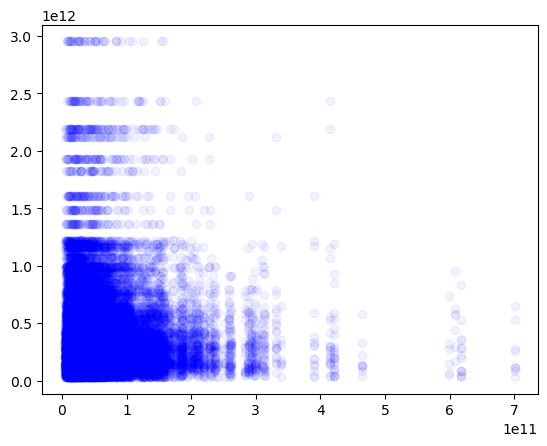

In [149]:
fig, ax = plt.subplots()
for n in range(100):
    indice = shuffle(np.arange(5000))[0:400]
    imp_ord_tc = order_events_by_indices(impacts_yearsets[warming][exp]['TC'], indice)
    imp_ord_rf = order_events_by_indices(impacts_yearsets[warming][exp]['RF'], indice)
    p = np.percentile(imp_ord_tc.at_event,0)
    ax.scatter(imp_ord_tc.at_event[imp_ord_tc.at_event>p], imp_ord_rf.at_event[imp_ord_tc.at_event>p], alpha=0.05,color='blue')




fig, ax = plt.subplots()
for n in range(100):
    indice = shuffle(np.arange(5000))[0:400]
    imp_ord_tc = order_events_by_indices(impacts_yearsets[warming][exp]['TC'], indice)
    indice = shuffle(np.arange(5000))[0:400]
    imp_ord_rf = order_events_by_indices(impacts_yearsets[warming][exp]['RF'], indice)
    p = np.percentile(imp_ord_tc.at_event,0)
    ax.scatter(imp_ord_tc.at_event[imp_ord_tc.at_event>p], imp_ord_rf.at_event[imp_ord_tc.at_event>p], alpha=0.05, color='blue')


In [82]:
p

42580418759.12401

In [141]:
impact_combined[warming][exposure][('TC', 'RF')].event_name

['2019_ipsl-cm5a-lr_rcp60_15',
 '2019_ipsl-cm5a-lr_rcp60_2',
 '2019_ipsl-cm5a-lr_rcp60_1',
 '2019_ipsl-cm5a-lr_rcp26_15',
 '2019_ipsl-cm5a-lr_rcp26_13',
 '2019_ipsl-cm5a-lr_rcp60_7',
 '2019_ipsl-cm5a-lr_rcp60_13',
 '2019_ipsl-cm5a-lr_rcp26_3',
 '2019_ipsl-cm5a-lr_rcp60_24',
 '2019_ipsl-cm5a-lr_rcp26_10',
 '2019_ipsl-cm5a-lr_rcp60_24',
 '2019_ipsl-cm5a-lr_rcp26_8',
 '2019_ipsl-cm5a-lr_rcp60_2',
 '2019_ipsl-cm5a-lr_rcp26_23',
 '2019_ipsl-cm5a-lr_rcp60_12',
 '2019_ipsl-cm5a-lr_rcp26_18',
 '2019_ipsl-cm5a-lr_rcp60_0',
 '2019_ipsl-cm5a-lr_rcp60_17',
 '2019_ipsl-cm5a-lr_rcp26_22',
 '2019_ipsl-cm5a-lr_rcp60_19',
 '2019_ipsl-cm5a-lr_rcp60_20',
 '2019_ipsl-cm5a-lr_rcp60_18',
 '2019_ipsl-cm5a-lr_rcp60_8',
 '2019_ipsl-cm5a-lr_rcp26_6',
 '2019_ipsl-cm5a-lr_rcp60_24',
 '2019_ipsl-cm5a-lr_rcp60_22',
 '2019_ipsl-cm5a-lr_rcp26_13',
 '2019_ipsl-cm5a-lr_rcp60_23',
 '2019_ipsl-cm5a-lr_rcp60_1',
 '2019_ipsl-cm5a-lr_rcp60_22',
 '2019_ipsl-cm5a-lr_rcp60_16',
 '2019_ipsl-cm5a-lr_rcp26_15',
 '2019_ipsl-cm5a-l

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

fq_single_hazard = {}
aai_single_hazard = {}

y100_single_hazard = {}



colors = {'1':'lightblue', '2':'plum', '3':'black'}

for exposure in ["assets", "pop"]:
    for warming in ["1","2"]:
        fig,ax = plt.subplots(figsize=(5.4,4))

        fq_list, fq.return_per =  make_fq_list(impact_combined_ordered[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list, fq.return_per, ax, color="Violet", label="Common drivers", range=True)

        fq_list_rf, fq.return_per =  make_fq_list(impact_combined[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="green", label="Mixed", range=True)

    #         fq_list_rf, fq.return_per =  make_fq_list(impact_combined_ordered['3'][exposure][('TC', 'RF')])
    #         plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="gray", label="3", range=True)


        #ax.set_ylabel(ylabel[exposure])
        ax.set_xlabel("Return period (Year)")
        ax.set_ylabel(ylabel[exposure])
        #plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/compound_ordered_vs_random_'+exposure+'_'+warming+'.pdf', bbox_inches='tight')

        #ax.set_title(" ".join([haz, exposure]))

        

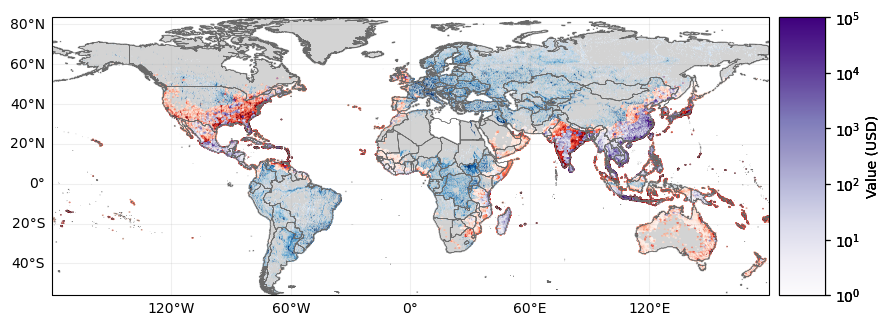

In [37]:
import matplotlib
import matplotlib.pyplot as plt

cmap_copy = plt.cm.get_cmap('Blues').copy()
cmap_copy.set_under('lightgray', alpha=1)

ax = impacts_yearsets['1']['assets']['RF'].plot_hexbin_eai_exposure(pop_name=False, cmap=cmap_copy,adapt_fontsize=False, norm=matplotlib.colors.SymLogNorm(vlinthresh=1, vmin=1, vmax=10e4))


cmap_copy = plt.cm.get_cmap('Reds').copy()
cmap_copy.set_under('w', alpha=0)

impacts_yearsets['1']['assets']['TC'].plot_hexbin_eai_exposure(axis=ax, pop_name=False, adapt_fontsize=False, cmap=cmap_copy, norm=matplotlib.colors.SymLogNorm(linthresh=1, vmin=1, vmax=10e4))



cmap_copy = plt.cm.get_cmap('Purples').copy()
cmap_copy.set_under('w', alpha=0)
impact_combined_ordered['1']['assets'][('TC','RF')].coord_exp = impacts_yearsets['1']['assets']['RF'].coord_exp

impact_combined_ordered['1']['assets'][('TC','RF')].plot_hexbin_eai_exposure(pop_name=False, axis=ax, cmap=cmap_copy, norm=matplotlib.colors.SymLogNorm(linthresh=1, vmin=1, vmax=10e4), adapt_fontsize=False)

ax.set_title('')
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk/figures/compound_map_assets.jpeg', dpi=1200, bbox_inches='tight')




In [12]:
gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf

In [16]:
gdf = gdf[gdf.value>0]



In [7]:
gdf

,value,latitude,longitude
29172,0.012629,31.770833,62.979167
29173,0.012401,31.770833,63.020833
29363,0.012755,31.729167,62.979167
29364,0.012755,31.729167,63.020833
29548,0.006424,31.687500,62.937500
...,...,...,...
8738058,0.010065,-22.187500,29.354167
8738059,0.034964,-22.187500,29.895833
8738060,12.105866,-22.187500,29.937500
8738061,27.841195,-22.187500,29.979167


In [13]:
import geopandas as gpd
gdf = gdf[gdf.value>0]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)

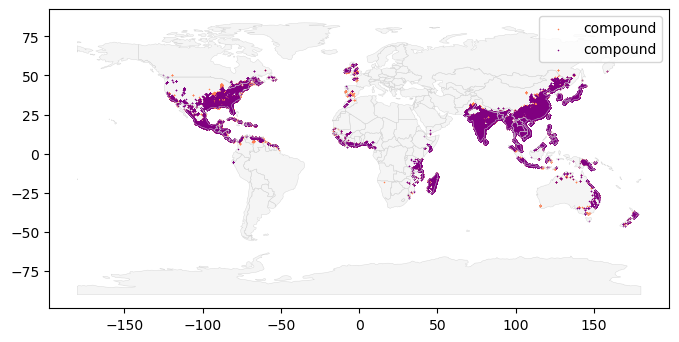

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.3)


gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='coral', markersize=0.00001,marker='*', label='compound')
ax.legend()

gdf = impact_combined_ordered['2']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.00001,marker='*', label='compound')
ax.legend()
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/figures/compound_map_binary_assets_cc.jpeg', dpi=1200)

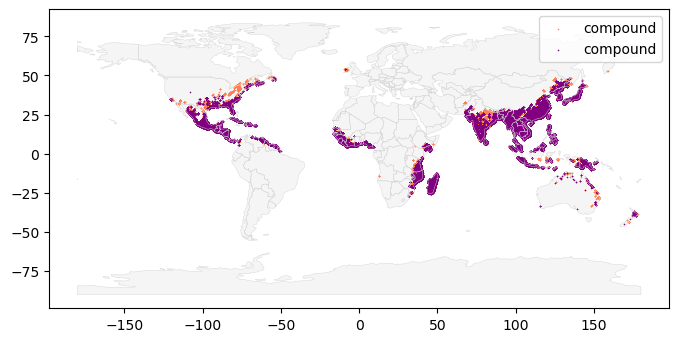

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.3)


gdf = impact_combined_ordered['2']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>0.1]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='coral', markersize=0.00001,marker='*', label='compound')
ax.legend()

gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>0.1]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.00001,marker='*', label='compound')
ax.legend()
#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk/figures/compound_map_binary_pop_cc.jpeg', dpi=1200)

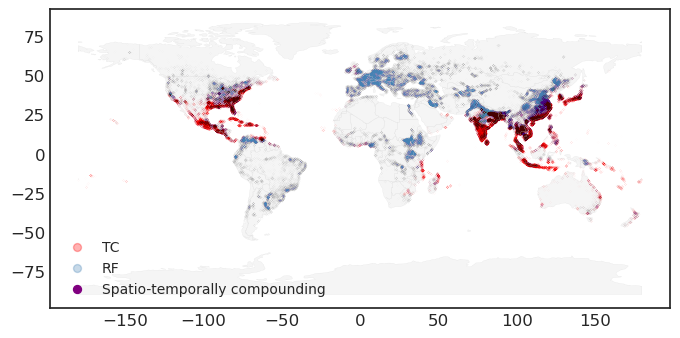

In [53]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)


gdf = impacts_yearsets['1']['assets']['TC']._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='red', markersize=0.0001,marker='.', label='TC', alpha=0.3)

gdf = impacts_yearsets['1']['assets']['RF']._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='steelblue', markersize=0.0001,marker='.', label='RF', alpha=0.3)


gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>1000]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Spatio-temporally compounding')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]
lgnd.legendHandles[1]._sizes = [130]
lgnd.legendHandles[2]._sizes = [130]
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_assets.jpeg', dpi=1600)

In [43]:
impact_combined_ordered['1']['assets']['TC'].event_name

['2006_gfdl-esm2m_rcp26_19',
 '2006_gfdl-esm2m_rcp26_12',
 '2006_gfdl-esm2m_rcp60_1',
 '2006_gfdl-esm2m_rcp60_19',
 '2006_gfdl-esm2m_rcp26_21',
 '2006_gfdl-esm2m_rcp60_2',
 '2006_gfdl-esm2m_rcp60_6',
 '2006_gfdl-esm2m_rcp60_6',
 '2006_gfdl-esm2m_rcp26_8',
 '2006_gfdl-esm2m_rcp26_23',
 '2006_gfdl-esm2m_rcp26_10',
 '2006_gfdl-esm2m_rcp26_14',
 '2006_gfdl-esm2m_rcp26_24',
 '2006_gfdl-esm2m_rcp26_5',
 '2006_gfdl-esm2m_rcp26_18',
 '2006_gfdl-esm2m_rcp26_1',
 '2006_gfdl-esm2m_rcp60_16',
 '2006_gfdl-esm2m_rcp26_5',
 '2006_gfdl-esm2m_rcp26_21',
 '2006_gfdl-esm2m_rcp60_11',
 '2006_gfdl-esm2m_rcp60_12',
 '2006_gfdl-esm2m_rcp26_17',
 '2006_gfdl-esm2m_rcp60_16',
 '2006_gfdl-esm2m_rcp60_16',
 '2006_gfdl-esm2m_rcp26_16',
 '2006_gfdl-esm2m_rcp60_2',
 '2006_gfdl-esm2m_rcp26_1',
 '2006_gfdl-esm2m_rcp26_10',
 '2006_gfdl-esm2m_rcp26_20',
 '2006_gfdl-esm2m_rcp60_25',
 '2006_gfdl-esm2m_rcp26_25',
 '2006_gfdl-esm2m_rcp60_12',
 '2006_gfdl-esm2m_rcp60_22',
 '2006_gfdl-esm2m_rcp60_21',
 '2006_gfdl-esm2m_rcp26_

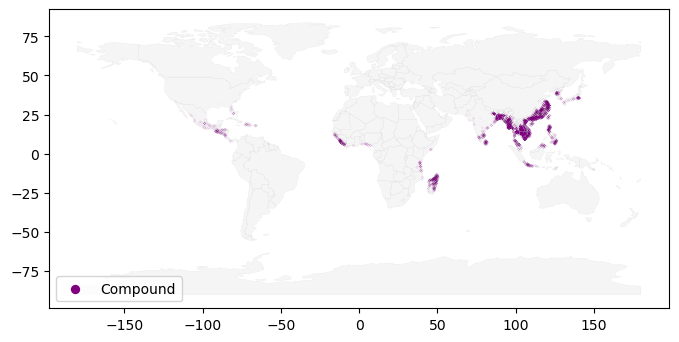

In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Compound')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

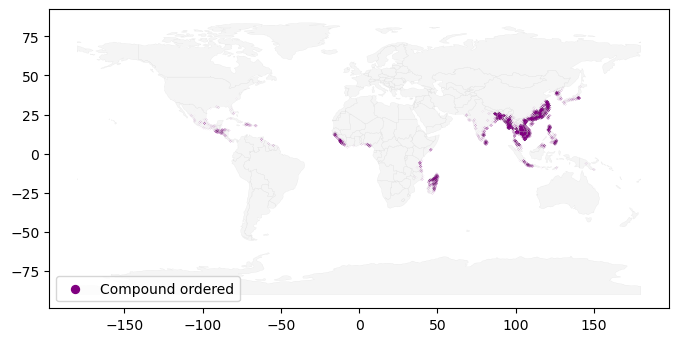

In [24]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Compound ordered')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

In [36]:
gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf

In [40]:
mask

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 8847256    False
 8847257    False
 8847258    False
 8847259    False
 8847260    False
 Name: value, Length: 8847261, dtype: bool]

<AxesSubplot:>

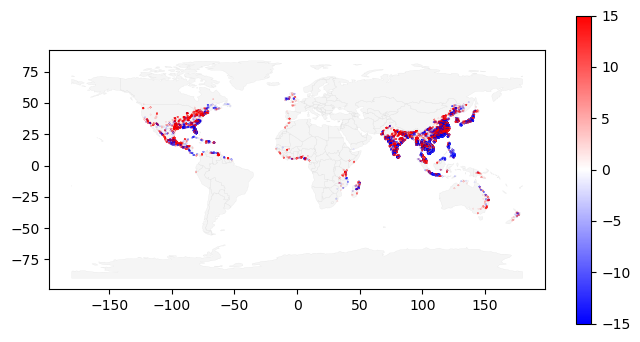

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import colors


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined_ordered['2']['assets'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['2']['assets'][('TC','RF')]._build_exp().gdf
mask = gdf.value>1000
gdf2 = gdf2[mask]
gdf = gdf[mask]

gdf['value'] = gdf['value'] -  gdf2['value']
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
divnorm=colors.TwoSlopeNorm(vmin=-15., vcenter=0., vmax=15)

gdf.plot('value', ax=ax, markersize=0.01,marker='.', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)
# lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
# lgnd.legendHandles[0]._sizes = [130]

#plt.savefig('/Users/szelie/Desktop/compare_map_compound_pop.jpeg', dpi=1600)

In [132]:
gdf

,value,latitude,longitude
331114,10.635731,-19.312500,146.729167
361689,24.056854,-21.104167,149.187500
362490,26.426447,-21.145833,149.187500
684063,12.603215,6.854167,1.645833
684091,15.129069,6.812500,1.645833
...,...,...,...
8703758,31.611067,9.104167,105.020833
8703759,243.491029,9.104167,105.062500
8703760,13.218718,9.104167,105.104167
8703761,18.547509,9.104167,105.145833


In [136]:
gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['1']['pop'][('TC','RF')]._build_exp().gdf
mask = gdf.value>1
gdf2 = gdf2[mask]
gdf = gdf[mask]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf2 = gpd.GeoDataFrame(gdf2, geometry=gpd.points_from_xy(gdf2.longitude, gdf2.latitude))



gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
gpd_countries = gpd_countries.groupby('iso_a3').agg('sum').reset_index()
gpd_countries = gpd_countries.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

gpd_countries2 = gpd.sjoin(gdf2, world, how="inner", op='within')
gpd_countries2 = gpd_countries2.groupby('iso_a3').agg('sum').reset_index()
gpd_countries2 = gpd_countries2.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

gpd_countries['value'] = gpd_countries['value'] - gpd_countries2['value']
gpd_countries = gpd.GeoDataFrame(gpd_countries, geometry=gpd_countries['geometry'])

ivnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=1500)

gpd_countries.plot('value', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_27662/793909571.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_27662/793909571.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpd_countries = g

In [144]:
gpd_countries[gpd_countries.iso_a3=='MOZ']

,iso_a3,value,latitude,longitude,index_right,pop_est,gdp_md_est,geometry
41,MOZ,-10334.714124,-267.666667,707.083333,1296,546588648.0,275238,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_27662/3499961587.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_27662/3499961587.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpd_countries =

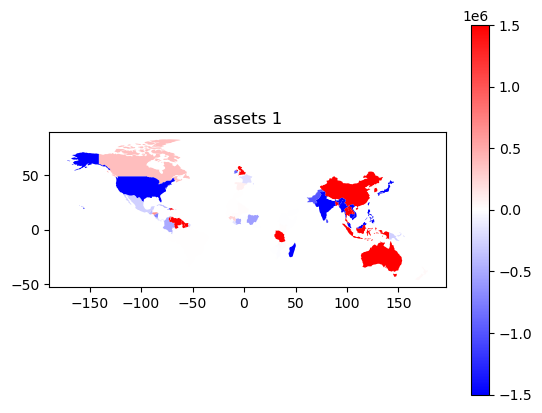

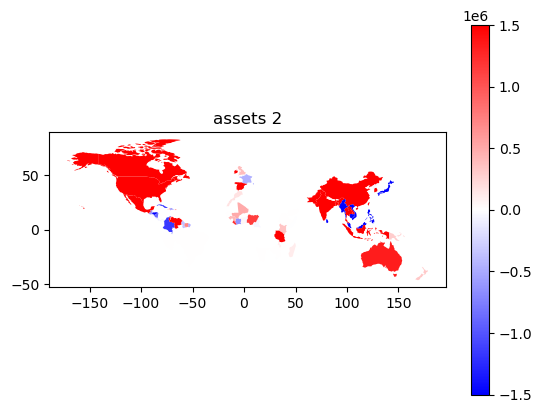

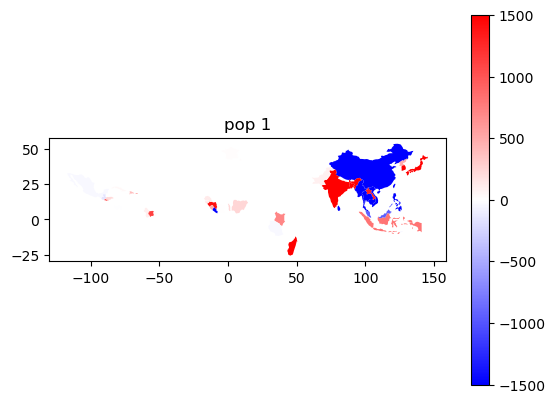

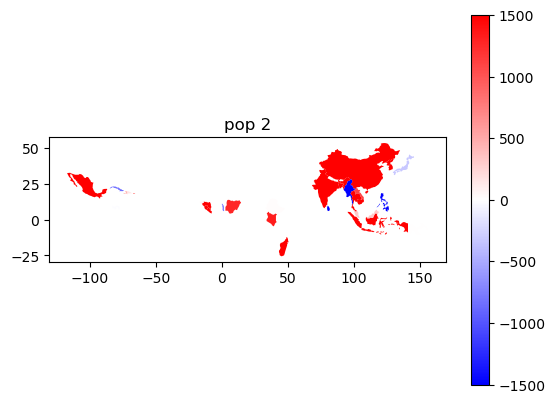

In [152]:
for exp in ['assets','pop']:
    for temp in ['1','2']:

        gdf = impact_combined_ordered[temp][exp][('TC','RF')]._build_exp().gdf
        gdf2 = impact_combined[temp][exp][('TC','RF')]._build_exp().gdf
        mask = gdf.value>100
        gdf2 = gdf2[mask]
        gdf = gdf[mask]
        gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
        gdf2 = gpd.GeoDataFrame(gdf2, geometry=gpd.points_from_xy(gdf2.longitude, gdf2.latitude))



        gpd_countries = gpd.sjoin(gdf, world, how="inner", op='within')
        gpd_countries = gpd_countries.groupby('iso_a3').agg('sum').reset_index()
        gpd_countries = gpd_countries.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

        gpd_countries2 = gpd.sjoin(gdf2, world, how="inner", op='within')
        gpd_countries2 = gpd_countries2.groupby('iso_a3').agg('sum').reset_index()
        gpd_countries2 = gpd_countries2.merge(world[['geometry','iso_a3']], how='inner', on='iso_a3')

        gpd_countries['value'] = gpd_countries['value'] - gpd_countries2['value']
        gpd_countries = gpd.GeoDataFrame(gpd_countries, geometry=gpd_countries['geometry'])
        gpd_countries = gpd_countries[gpd_countries['iso_a3']!='RUS']
        if exp=='assets':
            divnorm=colors.TwoSlopeNorm(vmin=-1500000., vcenter=0., vmax=1500000)
        else:
            divnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=1500)
     

        gpd_countries.plot('value', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)
        plt.title(exp+" "+temp)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

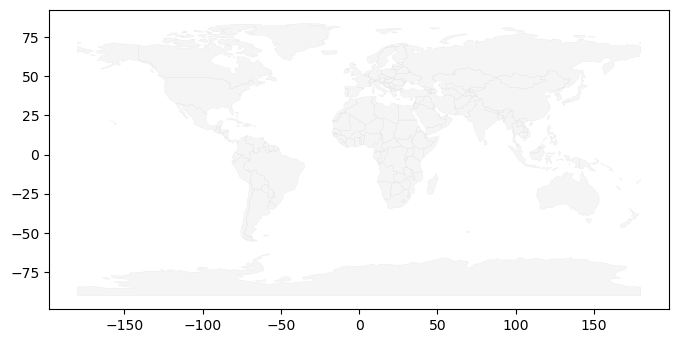

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import colors


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)

gdf = impact_combined_ordered['1']['assets'][('TC','RF')]._build_exp().gdf
gdf2 = impact_combined['1']['assets'][('TC','RF')]._build_exp().gdf
mask = gdf.value>1000
gdf2 = gdf2[mask]
gdf = gdf[mask]
gdf.merge(world)

gdf['value'] = gdf['value'] -  gdf2['value']
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
divnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=1500)

gdf.plot('value', ax=ax, markersize=0.002,marker='.', label='Compound difference', legend=True, cmap='bwr', norm=divnorm)
# lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
# lgnd.legendHandles[0]._sizes = [130]

plt.savefig('/Users/szelie/Desktop/compare_map_compound_pop.jpeg', dpi=1600)

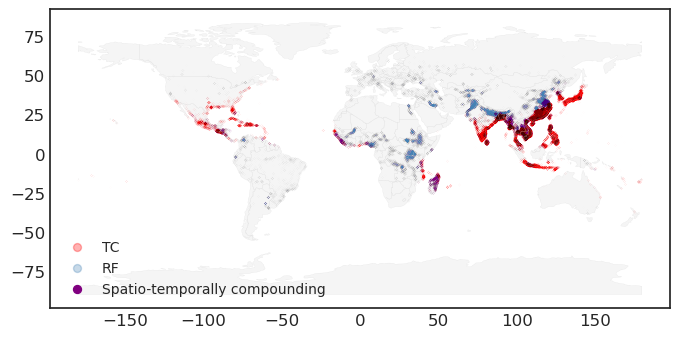

In [52]:
import matplotlib.pyplot as plt
import geopandas as gpd


fig, ax = plt.subplots(1, 1, figsize=(8, 4))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color='whitesmoke', ax=ax)
world.boundary.plot(color='lightgrey', ax=ax, linewidth=0.1)


gdf = impacts_yearsets['1']['pop']['TC']._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='red', markersize=0.0001,marker='.', label='TC', alpha=0.3)

gdf = impacts_yearsets['1']['pop']['RF']._build_exp().gdf
gdf = gdf[gdf.value>100]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
gdf.plot(ax=ax, color='steelblue', markersize=0.0001,marker='.', label='RF', alpha=0.3)


gdf = impact_combined_ordered['1']['pop'][('TC','RF')]._build_exp().gdf
gdf = gdf[gdf.value>10]
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))
#gdf.crs = gdf.set_crs(epsg=4326)
gdf.plot(ax=ax, color='purple', markersize=0.0001,marker='.', label='Spatio-temporally compounding')
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]
lgnd.legendHandles[1]._sizes = [130]
lgnd.legendHandles[2]._sizes = [130]
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/map_compound_pop.jpeg', dpi=1600)

In [164]:
impact_combined_ordered['1']['assets'][('TC','RF')].at_event[impact_combined_ordered['1']['assets'][('TC','RF')].event_name=='2007_gfdl-esm2m_rcp26_54']


array([], shape=(0, 5350), dtype=float64)

In [198]:
impact_combined_ordered['1']['assets'][('TC','RF')].aai_agg

8065040365.180067

In [199]:
impact_combined['1']['assets'][('TC','RF')].aai_agg

8885801692.969856

In [21]:
aai_single_hazard = {warming:{exp:{hazard: impacts_yearsets[warming][exp][hazard].aai_agg 
                                  for hazard in impacts_yearsets[warming][exp]} for 
                            exp in impacts_yearsets[warming]} for warming in impacts_yearsets}

aai_ord = {warming:{exp:{combi: impact_combined_ordered[warming][exp][combi].aai_agg 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

y100_single_hazard = {warming:{exp:{hazard: impacts_yearsets[warming][exp][hazard].calc_freq_curve().impact[impacts_yearsets[warming][exp][hazard].calc_freq_curve().return_per>100][0] 
                                  for hazard in impacts_yearsets[warming][exp]} for 
                            exp in impacts_yearsets[warming]} for warming in impacts_yearsets}

y100_aai_ord = {warming:{exp:{combi: impact_combined_ordered[warming][exp][combi].calc_freq_curve().impact[impact_combined_ordered[warming][exp][combi].calc_freq_curve().return_per>100][0] 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

y100_aai = {warming:{exp:{combi: impact_combined[warming][exp][combi].calc_freq_curve().impact[impact_combined[warming][exp][combi].calc_freq_curve().return_per>100][0] 
                                  for combi in impact_combined_ordered[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}

aai = {warming:{exp:{combi: impact_combined[warming][exp][combi].aai_agg 
                                  for combi in impact_combined[warming][exp]} for 
                            exp in impact_combined_ordered[warming]} for warming in impact_combined_ordered}


In [22]:
rel_change_dict = {warming:{exp:{hazard: (np.median(aai_single_hazard[warming][exp][hazard]) - np.median(aai_single_hazard['1'][exp][hazard]))/np.median(aai_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined = {warming:{exp:{hazard: (np.median(aai_ord[warming][exp][hazard]) - np.median(aai_ord['1'][exp][hazard]))/np.median(aai_ord['1'][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}   

rel_change_dict_100y = {warming:{exp:{hazard: (np.median(y100_single_hazard[warming][exp][hazard]) - np.median(y100_single_hazard['1'][exp][hazard]))/np.median(y100_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined_100y = {warming:{exp:{hazard: (np.median(y100_aai_ord[warming][exp][hazard]) - np.median(y100_aai_ord['1'][exp][hazard]))/np.median(y100_aai_ord['1'][exp][hazard])\
     for hazard in y100_aai_ord[warming][exp]} for exp in y100_aai_ord[warming]} \
     for warming in y100_aai_ord}       



            

In [23]:
rel_diff_dict_combined_ord = {warming:{exp:{hazard: (np.median(aai[warming][exp][hazard]) - np.median(aai_ord[warming][exp][hazard]))/np.median(aai_ord[warming][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}   

In [24]:
rel_diff_dict_100y_ord = {warming:{exp:{hazard: (np.median(y100_aai[warming][exp][hazard]) - np.median(y100_aai_ord[warming][exp][hazard]))/np.median(y100_aai_ord[warming][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}  

In [25]:
rel_diff_dict_100y_ord

{'1': {'assets': {('TC', 'RF'): 0.11907506444353803},
  'pop': {('TC', 'RF'): 0.3558179838224222}},
 '2': {'assets': {('TC', 'RF'): 0.08521135175319358},
  'pop': {('TC', 'RF'): 0.06182037713486955}}}

In [26]:
y100_aai_ord

{'1': {'assets': {('TC', 'RF'): 63626008033.82122},
  'pop': {('TC', 'RF'): 30410160.3666937}},
 '2': {'assets': {('TC', 'RF'): 82561875960.43356},
  'pop': {('TC', 'RF'): 38776544.11983393}}}

In [27]:
rel_change_dict_combined

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.3977277028881242},
  'pop': {('TC', 'RF'): 0.2882667730981572}}}

In [28]:
rel_change_dict_combined_100y

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.29761206952582564},
  'pop': {('TC', 'RF'): 0.27511804121570477}}}